In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



position_mapping = {
    'ST': 'Forward',
    'CF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'CAM': 'Midfielder',
    'RM': 'Midfielder',
    'LM': 'Midfielder',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'LWB': 'Defender',
    'RWB': 'Defender',
}

In [2]:
df = pd.read_csv('./FIFA18_players_database/clean_data.csv')
df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,65,73,64,62,56,63,45,41,53,33,...,66,58,59,63,86,63,74,58,34,CDM
1,77,68,80,67,58,39,39,48,53,29,...,56,57,51,76,83,54,65,48,49,CM
2,76,53,58,46,70,71,50,42,66,67,...,59,75,16,78,45,26,90,59,64,ST
3,61,77,72,75,75,73,75,71,75,71,...,72,78,49,60,65,55,67,73,65,CM
4,67,82,60,51,70,73,50,35,65,36,...,68,55,74,73,74,76,84,43,35,CB


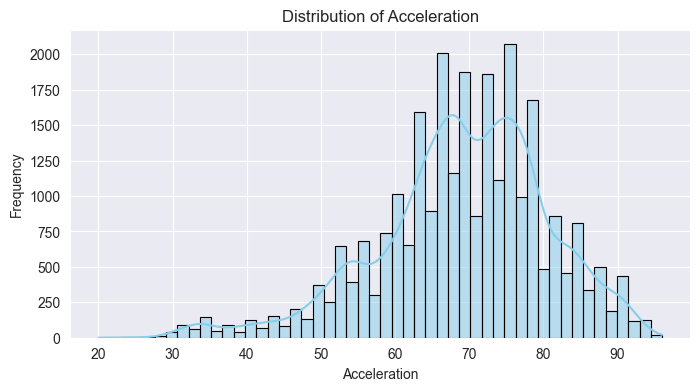

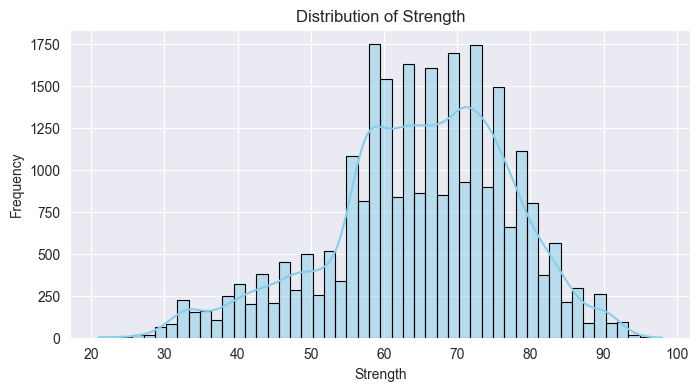

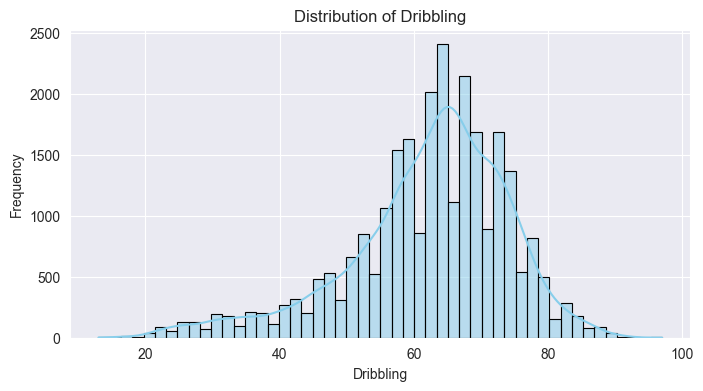

In [3]:
columns_to_plot = ['Acceleration', 'Strength', 'Dribbling']
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

All the distribution is right heavy, might not be good when we are feeding this to the Machine Learning Model.

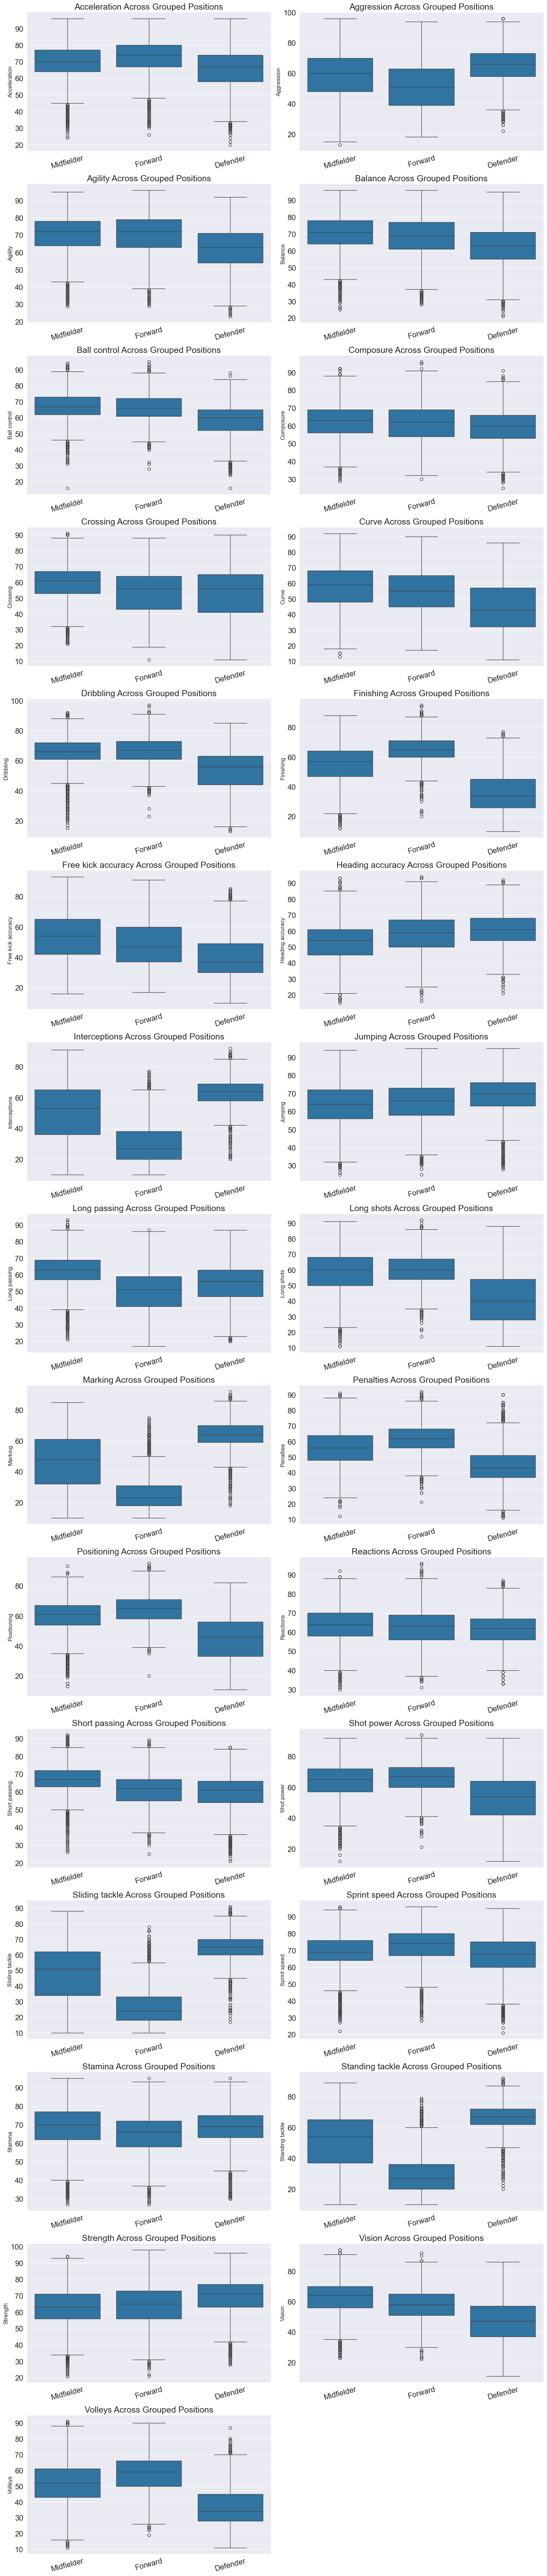

In [4]:
df['Grouped Positions'] = df['Preferred Positions'].map(position_mapping)

# Make a list of every column with a NUMERIC value 
numeric_columns = df.select_dtypes(include='number').columns

plots_per_row = 2

# Calculate rows and coloumns 
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / plots_per_row)

# Make figure
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 5))
axes = axes.flatten()  # Make the axes to a list

# Loop to make all the plots
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x='Grouped Positions', y=column, ax=axes[i])
    axes[i].set_title(f'{column} Across Grouped Positions', fontsize=18)
    axes[i].set_xlabel('')  # Remove the label of the x axis
    axes[i].set_ylabel(column, fontsize=12)
    axes[i].tick_params(axis='x', rotation=15, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)

# Remove useless boxplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()


We see that different positions has different types of strong attributes. Also the dots over and under the boxes shows that we have alot of outliers in some attributes.

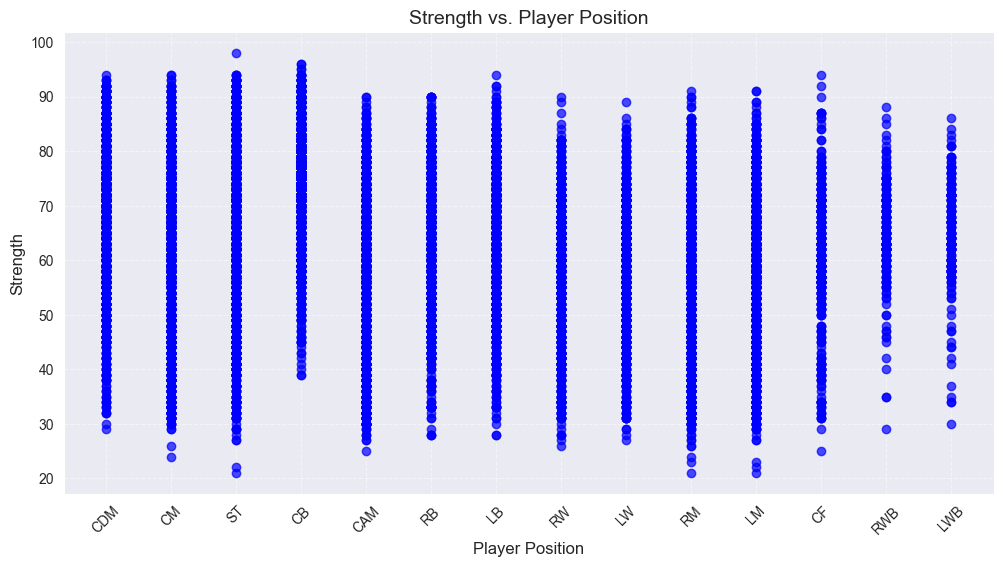

In [5]:
# Trying out scatter plotting
plt.figure(figsize=(12, 6))
positions = df['Preferred Positions'] # X
strength = df['Strength']  # Y

plt.scatter(positions, strength, alpha=0.7, color='blue')
plt.xlabel('Player Position', fontsize=12)
plt.ylabel('Strength', fontsize=12)
plt.title('Strength vs. Player Position', fontsize=14)
plt.xticks(rotation=45)  # Rotate X labels, better read ability
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We can clearly see that Strength is a clear attribute for defensive positions.

In [6]:
df_Normal = pd.read_csv("./FIFA18_players_database/clean_data_normalized.csv")
df_Normal.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0.425926,0.705128,0.446429,0.388889,0.279070,0.54,0.285714,0.281690,0.274510,0.272727,...,0.511628,0.413793,0.6125,0.333333,0.830189,0.654321,0.660714,0.464286,0.266667,CDM
1,0.648148,0.641026,0.732143,0.481481,0.325581,0.06,0.190476,0.380282,0.274510,0.220779,...,0.279070,0.396552,0.5125,0.604167,0.773585,0.543210,0.500000,0.285714,0.466667,CM
2,0.629630,0.448718,0.339286,0.092593,0.604651,0.70,0.365079,0.295775,0.529412,0.714286,...,0.348837,0.706897,0.0750,0.645833,0.056604,0.197531,0.946429,0.482143,0.666667,ST
3,0.351852,0.756410,0.589286,0.629630,0.720930,0.74,0.761905,0.704225,0.705882,0.766234,...,0.651163,0.758621,0.4875,0.270833,0.433962,0.555556,0.535714,0.732143,0.680000,CM
4,0.462963,0.820513,0.375000,0.185185,0.604651,0.74,0.365079,0.197183,0.509804,0.311688,...,0.558140,0.362069,0.8000,0.541667,0.603774,0.814815,0.839286,0.196429,0.280000,CB


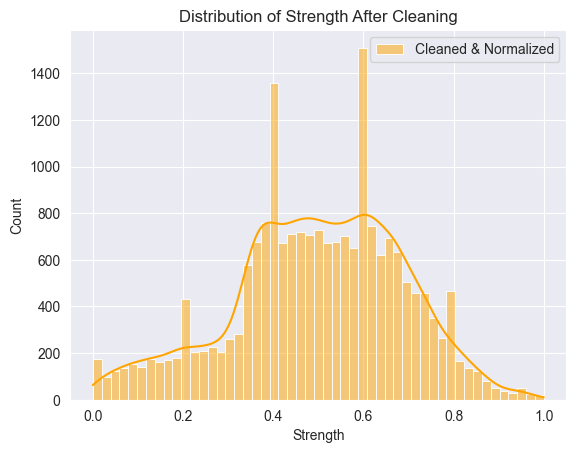

In [7]:
sns.histplot(df_Normal['Strength'], kde=True, color='orange', label='Cleaned & Normalized')
plt.legend()
plt.title('Distribution of Strength After Cleaning')
plt.show()

We see now after normalization and removing outliers that we have a more even graph

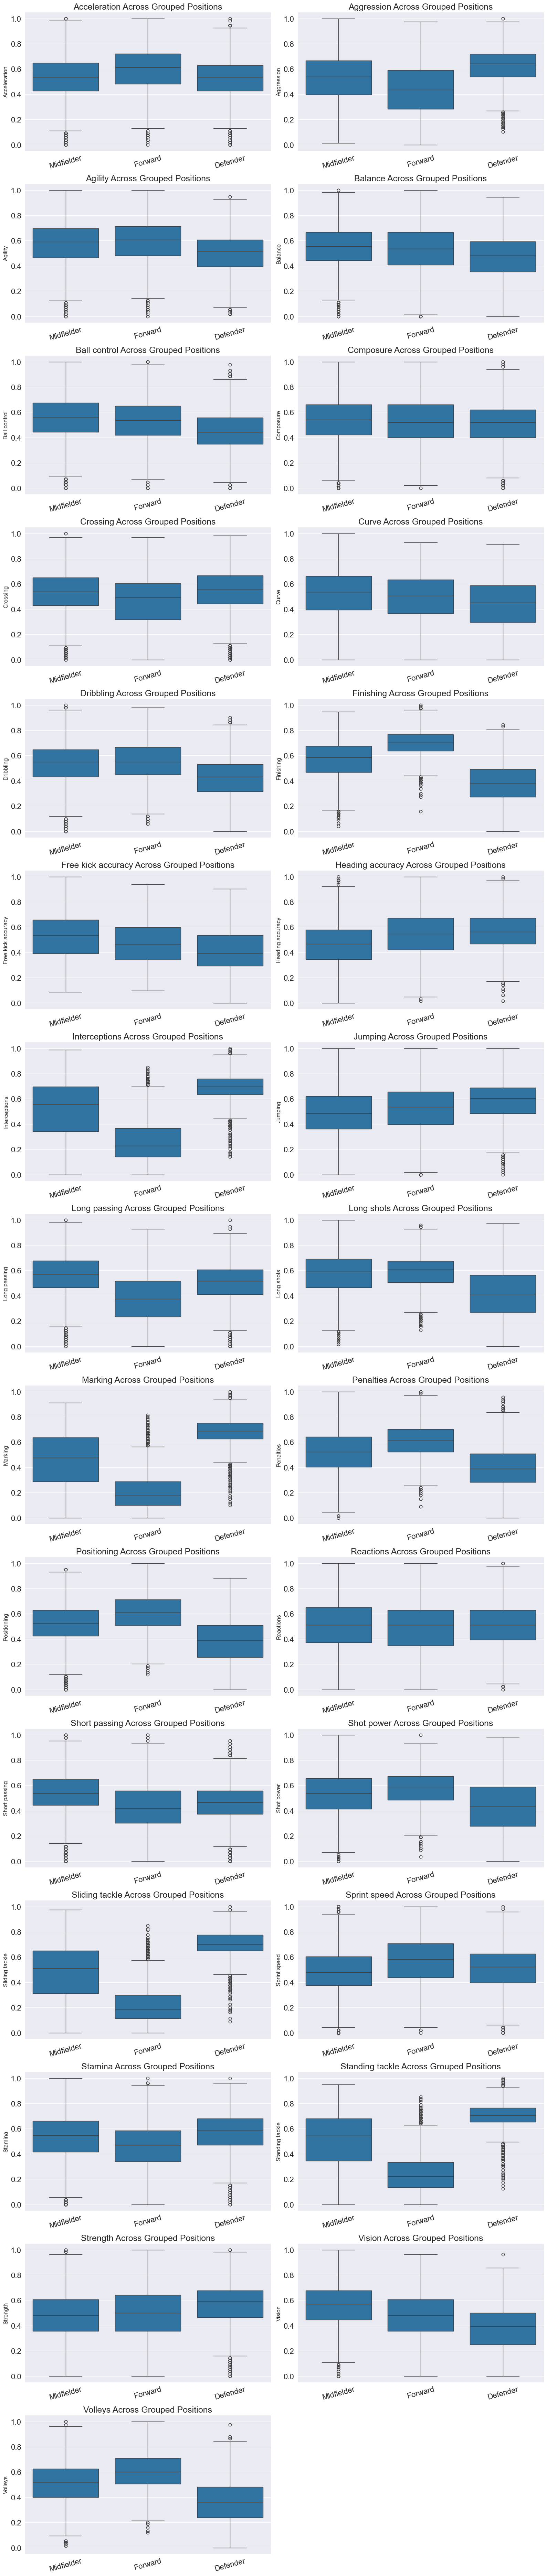

In [8]:
df_Normal['Grouped Positions'] = df_Normal['Preferred Positions'].map(position_mapping)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 5))
axes = axes.flatten()  

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df_Normal, x='Grouped Positions', y=column, ax=axes[i])
    axes[i].set_title(f'{column} Across Grouped Positions', fontsize=18)
    axes[i].set_xlabel('')  
    axes[i].set_ylabel(column, fontsize=12)
    axes[i].tick_params(axis='x', rotation=15, labelsize=16)
    axes[i].tick_params(axis='y', labelsize=16)

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
